<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [34]:
calories_dataset = pd.read_csv('/content/calories.csv')

In [35]:
calories_dataset.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [36]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [37]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [38]:
calories_main_dataset = pd.concat([exercise_data,calories_dataset['Calories']],axis=1)

In [39]:
calories_main_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [40]:
calories_main_dataset.shape

(15000, 9)

In [41]:
calories_main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [42]:
calories_main_dataset.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [43]:
calories_main_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [44]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

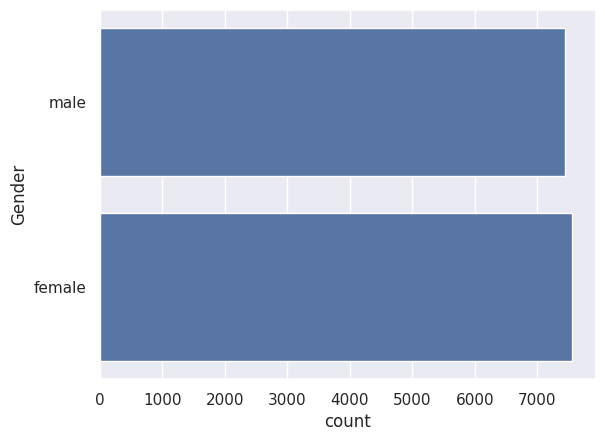

In [45]:
#plotting gender
sns.countplot(calories_main_dataset['Gender'])

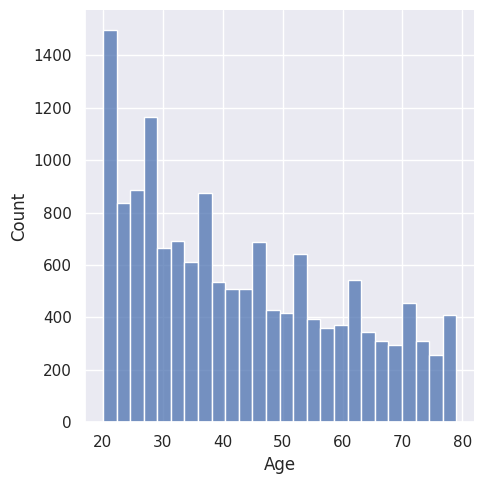

In [46]:
#plotting age
sns.displot(calories_main_dataset['Age'])

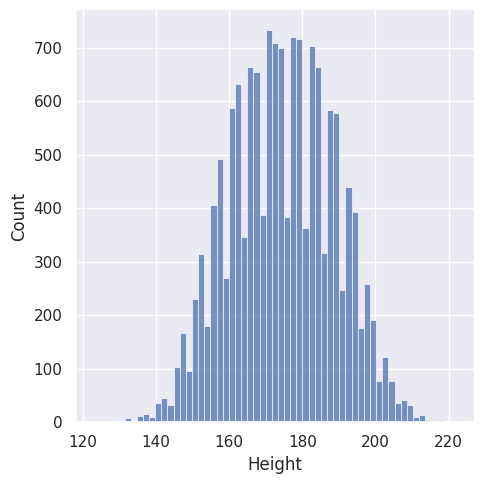

In [47]:
#plotting height
sns.displot(calories_main_dataset['Height'])

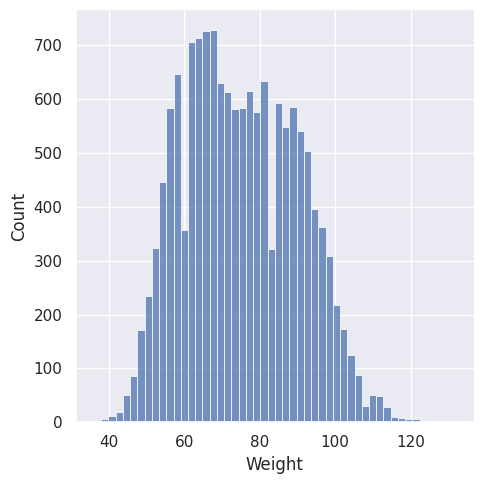

In [48]:
#plotting Weight
sns.displot(calories_main_dataset['Weight'])

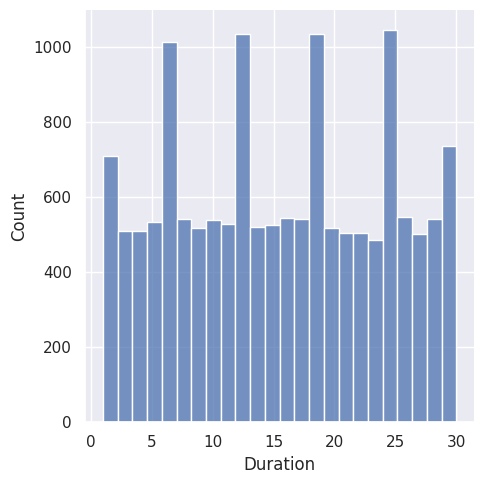

In [49]:
#plotting Duration
sns.displot(calories_main_dataset['Duration'])

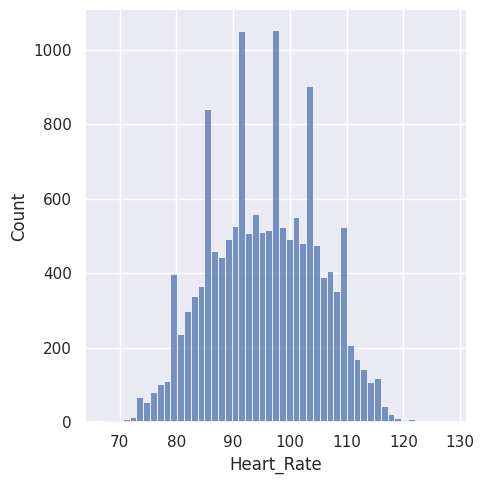

In [50]:
#plotting Heart_Rate
sns.displot(calories_main_dataset['Heart_Rate'])

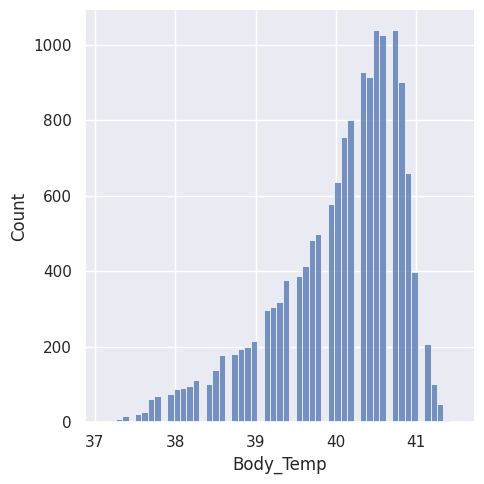

In [51]:
#plotting DuraBody_Temption
sns.displot(calories_main_dataset['Body_Temp'])

In [52]:
calories_main_dataset.replace({'Gender':{'male':1,'female':0}},inplace=True)

<ipython-input-52-3504561467>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_main_dataset.replace({'Gender':{'male':1,'female':0}},inplace=True)


In [53]:
# understanding the correlation between varius feature in the dataset  1. positive correlation 2. negative correlation
correlation = calories_main_dataset.corr()

<Axes: >

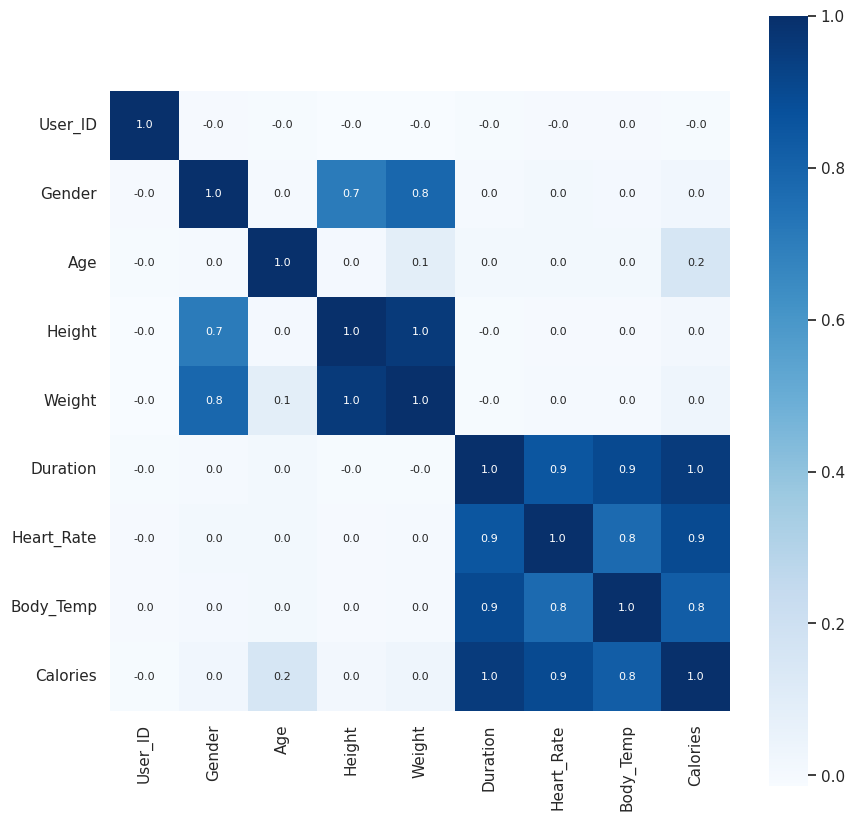

In [54]:
#constructing heatmap  to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [55]:
x= calories_main_dataset.drop(['User_ID','Calories'],axis=1)
y= calories_main_dataset['Calories']
print(x)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [56]:
#splitting the data fraam into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print("x:", x.shape)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x: (15000, 7)
x_train: (12000, 7)
x_test: (3000, 7)


In [57]:
#model traing (laoding the model)
model = XGBRegressor()
#traing the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
#preiction on the training data
#accuracy for prediction o training data
calories_main_dataset = model.predict(x_train)
print(calories_main_dataset)
score_1 = metrics.mean_absolute_error(y_train,calories_main_dataset)
print("mean absolute error ",score_1)

[ 11.680271  36.71814   31.747328 ... 108.05978  179.23735   44.236874]
mean absolute error  0.9322033420062313


In [59]:
#preiction on the testing data
#accuracy for prediction o testing data
calories_main_dataset = model.predict(x_test)
print(calories_main_dataset)
score_2 = metrics.mean_absolute_error(y_test,calories_main_dataset)
print("mean absolute error ",score_2)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]
mean absolute error  1.4833678883314132
